# 聚类算法实验
- Kmeans 与 DBSCAN 算法
- 半监督问题解决方案
- 聚类评估方法

In [50]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

## Kmeans

In [51]:
# 导入绘制 blobs 模块
from sklearn.datasets import make_blobs

# 5个中心点，5个簇
blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]]
)
# 发散程度
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

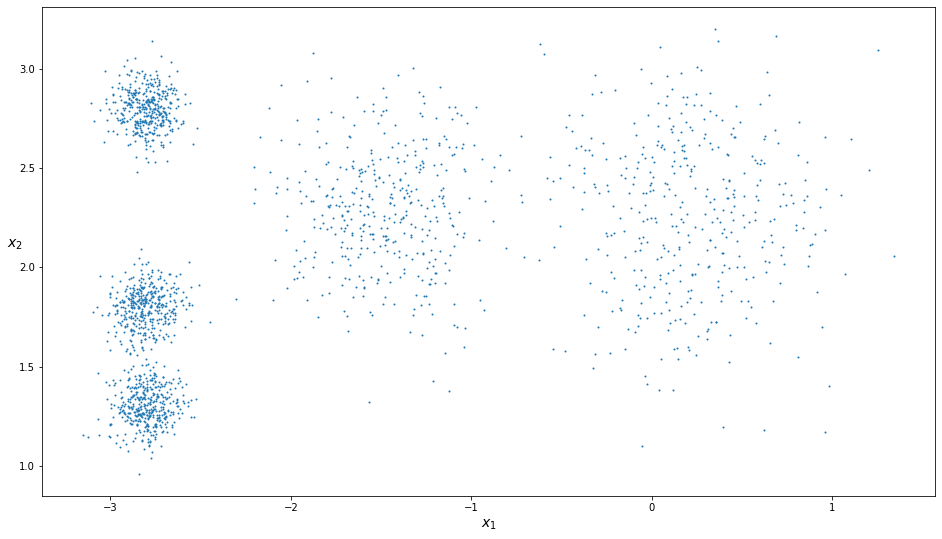

In [52]:
def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=1)
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14, rotation=0)
plt.figure(figsize=(16,9))
plot_clusters(X)
plt.show()

### 决策边界

In [53]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
y_pred = kmeans.fit_predict(X)

fit_predict(X) 与 kmeans.labels_ 得到的结果是一致的

In [54]:
y_pred

array([4, 0, 2, ..., 3, 2, 0])

In [55]:
kmeans.labels_

array([4, 0, 2, ..., 3, 2, 0])

In [56]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [57]:
X_new = np.array([[0,2], [3,2], [-3,3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 3, 3])

In [58]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'r.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max()/10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=3, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=5,
                color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlables=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap='Pastel2')
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlables:
        plt.xlabel('$x_1$', fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel('$x_2$', fontsize=14)
    else:
        plt.tick_params(labelleft='off')



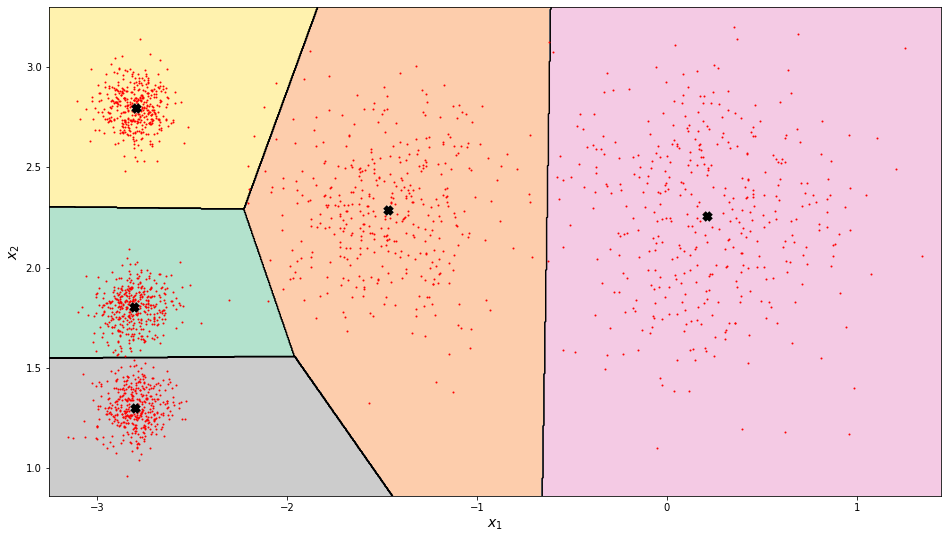

In [59]:
plt.figure(figsize=(16,9))
plot_decision_boundaries(kmeans, X)
plt.show()

### 算法流程

In [60]:
kmeans_iter1 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

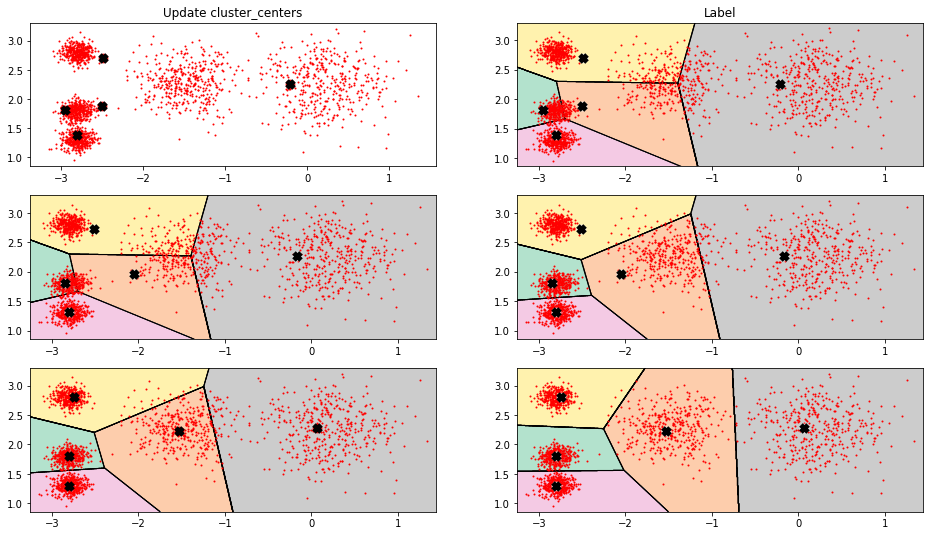

In [61]:
plt.figure(figsize=(16,9))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='k')
plt.title('Update cluster_centers')

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlables=False, show_ylabels=False)
plt.title('Label')

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_xlables=False, show_ylabels=False, show_centroids=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlables=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_xlables=False, show_ylabels=False, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_, circle_color='r', cross_color='k')

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_xlables=False, show_ylabels=False)

### 评估方法
- Inertia 指标：每个样本与其质心的距离

In [62]:
kmeans.inertia_

211.5985372581684

In [63]:
X_dist = kmeans.transform(X)

In [64]:
kmeans.transform(X)

array([[0.46779778, 1.54944305, 3.04611916, 1.45402521, 0.11146795],
       [0.07122059, 1.48612753, 3.11541584, 0.99002955, 0.51431557],
       [3.81713488, 2.67154781, 1.32016676, 4.09069201, 3.76340605],
       ...,
       [0.92830156, 1.40795651, 3.04886464, 0.06769209, 1.42865797],
       [3.10300136, 1.71125   , 0.14895409, 3.05913478, 3.23385668],
       [0.22700281, 1.21678483, 2.8625311 , 0.85434589, 0.67518173]])

In [65]:
kmeans.labels_

array([4, 0, 2, ..., 3, 2, 0])

In [66]:
X_dist[np.arange(len(X_dist)), kmeans.labels_]

array([0.11146795, 0.07122059, 1.32016676, ..., 0.06769209, 0.14895409,
       0.22700281])

In [67]:
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [68]:
kmeans.score(X)

-211.5985372581684

transform 得到的是当前样本到每个簇中心距离  
n_init 的目标就是多次尝试得到最优 Inertia

### 找到最佳簇数

In [69]:
kmeans_per_k = [KMeans(n_clusters=k).fit(X) for k in range(1,10)]
inertias = [model.inertia_  for model in kmeans_per_k]

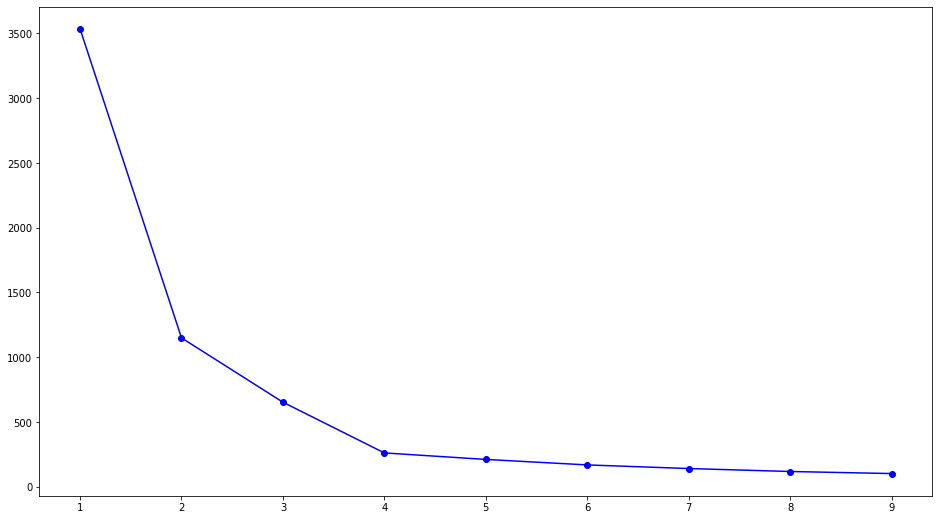

In [70]:
plt.figure(figsize=(16,9))
plt.plot(range(1, 10), inertias, 'bo-')
plt.show()

### 轮廓系数
- $a_i$：计算样本 $i$ 到同簇其他样本的平均距离，越小，说明样本样本 $i$ 越应该被聚类到该簇，将 $a_i$ 称为样本 $i$ 的簇内不相似度。
- $b_i$：计算样本 $i$ 到其他某簇 $C_j$ 的所有样本的平均距离 $b_{ij}$，称为样本 $i$ 与簇 $C_j$ 的不相似度。定义为样本的簇间不相似度：$b_i =min\left\{b_{i1},b_{i2},\cdots,b_{ik}\right\}$

$$
s(i)=\frac{b(i)-a(i)}{max\left\{a(i),b(i)\right\}}
$$

$$
s(i)=\left\{\begin{matrix}1-\frac{a(i)}{b(i)}, a(i)<b(i)\\0, a(i)=b(i)\\\frac{b(i)}{a(i)}-1, a(i)>b(i)
\end{matrix}\right.
$$

结论：
- $s(i)$ 接近 1，则说明样本 $i$ 聚类合理
- $s(i)$ 接近 -1，则说明样本 $i$ 更应该分类到另外的簇
- 若 $s(i)$ 近似为 0，则说明样本 $i$ 在两个簇的边界上 

In [71]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [72]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

In [73]:
silhouette_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.6023878186220234,
 0.6071325093726307,
 0.5611427500011699,
 0.567647042788722]

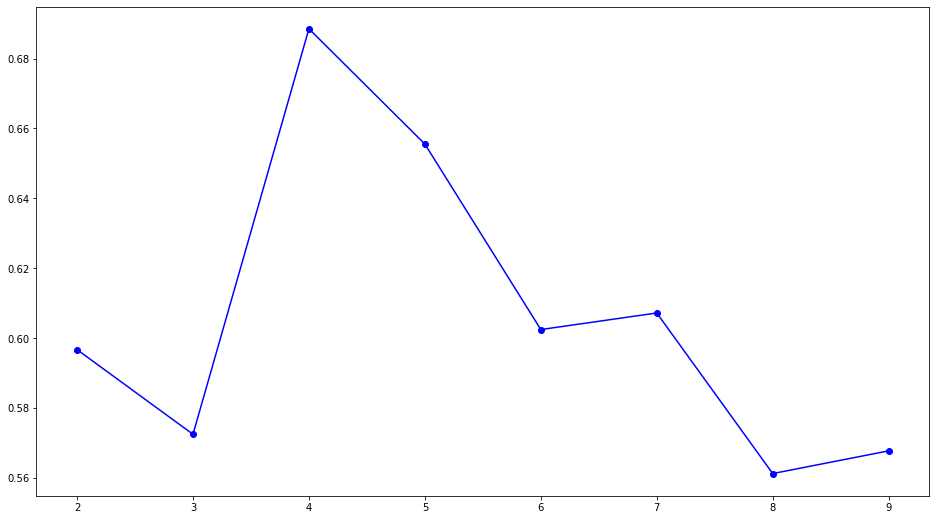

In [74]:
plt.figure(figsize=(16,9))
plt.plot(range(2,10), silhouette_scores, 'bo-')
plt.show()

### Kmeans 存在的问题

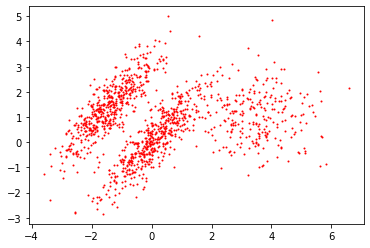

In [75]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]
plot_data(X)

In [76]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5,2.5], [0.5,0], [4,0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

Text(0.5, 1.0, 'Bad - inertia = 2179.4842787447324')

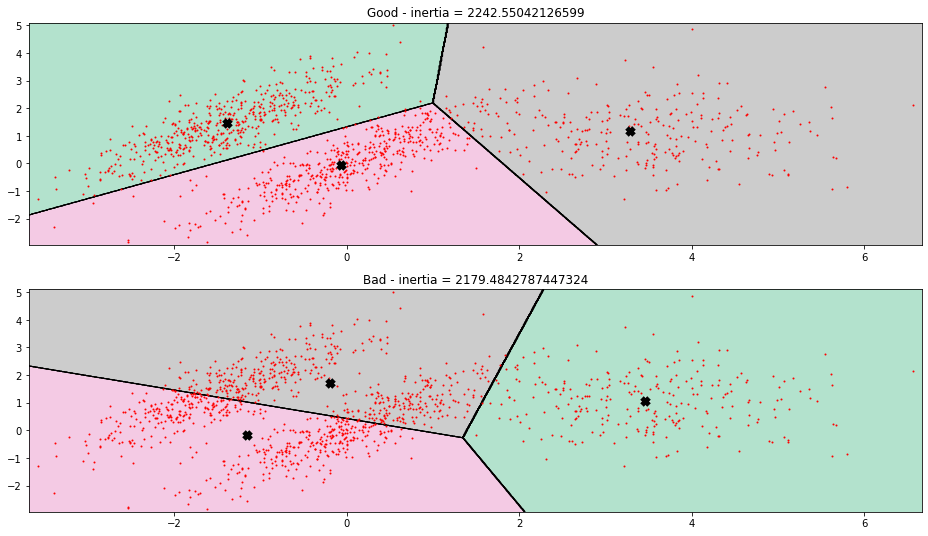

In [77]:
plt.figure(figsize=(16,9))
plt.subplot(211)
plot_decision_boundaries(kmeans_good, X, show_xlables=False, show_ylabels=False)
plt.title('Good - inertia = {}'.format(kmeans_good.inertia_))

plt.subplot(212)
plot_decision_boundaries(kmeans_bad, X, show_xlables=False, show_ylabels=False)
plt.title('Bad - inertia = {}'.format(kmeans_bad.inertia_))


**评估指标低的不一定是合适的**

### 图像分割

In [78]:
from matplotlib.image import imread
image = imread('./img/flower.png')
image.shape

(187, 236, 3)

In [79]:
X = image.reshape(-1,3)
X.shape

(44132, 3)

In [80]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [81]:
kmeans.cluster_centers_

array([[0.7414766 , 0.8247749 , 0.95159566],
       [0.8589691 , 0.68715197, 0.04059601],
       [0.2942441 , 0.10388482, 0.04982901],
       [0.32459766, 0.5932778 , 0.970085  ],
       [0.50245035, 0.63017356, 0.6308298 ],
       [0.9537667 , 0.8854939 , 0.05806261],
       [0.8104123 , 0.8321746 , 0.40213692],
       [0.59934306, 0.38799316, 0.11018896]], dtype=float32)

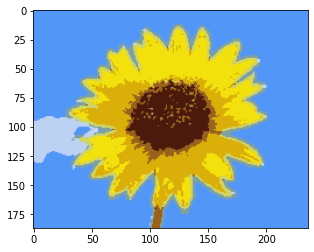

In [82]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)
plt.imshow(segmented_img)

In [83]:
segmented_imgs = []
n_colors = (10,8,6,4,2)
for n in n_colors:
    kmeans = KMeans(n_clusters=n, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

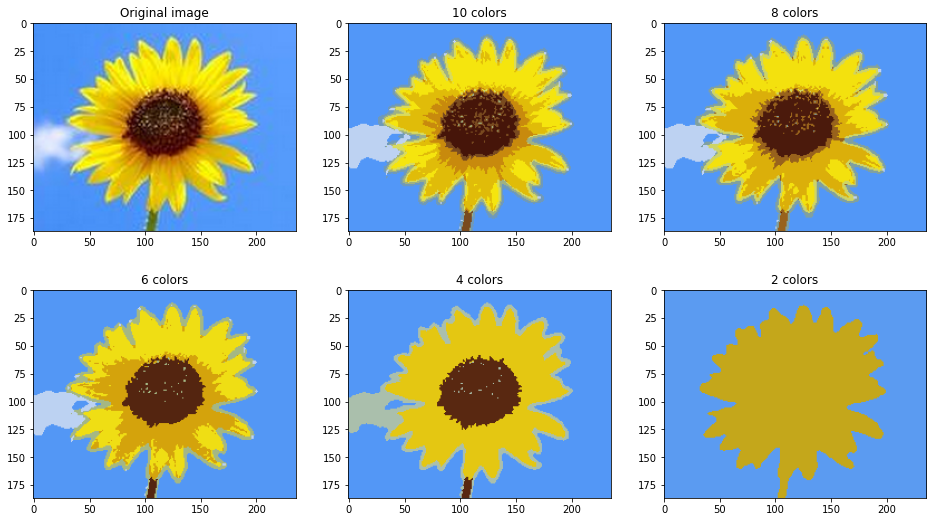

In [84]:
plt.figure(figsize=(16,9))
plt.subplot(231)
plt.imshow(image)
plt.title('Original image')

for idx, n in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{} colors'.format(n))

## 半监督学习
将训练集聚类为50个集群， 对于每个聚类，找到最靠近质心的图像。  
这些图像称为代表性图像。

In [85]:
# 载入手写字体数据集
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

# 数据集切分
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [86]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression
n_labeled = 50

log_reg = LogisticRegression(random_state=42)
# 前 50 个为有监督学习
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8266666666666667

In [87]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [88]:
# 每个簇中距离最近的
representative_digits_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digits_idx]

绘制代表性图像并手动标记

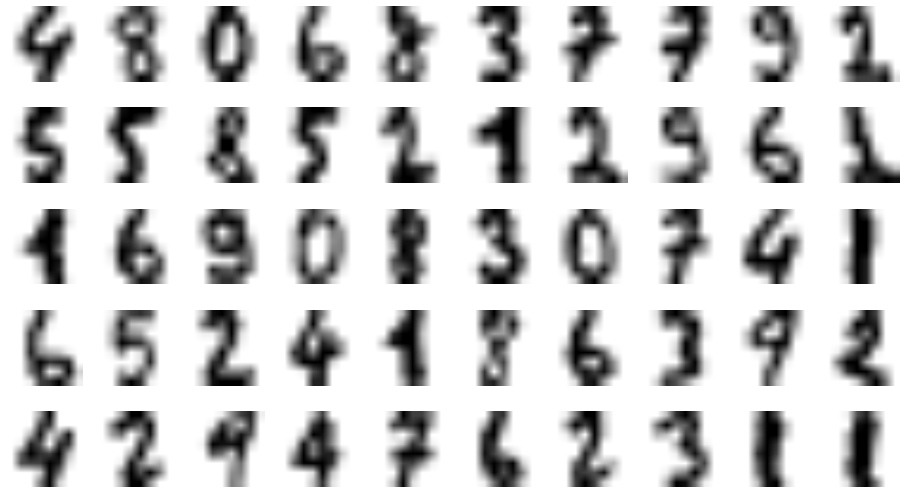

In [89]:
plt.figure(figsize=(16,9))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k//10, 10, index+1)
    plt.imshow(X_representative_digit.reshape(8,8), cmap='binary', interpolation='bilinear')
    plt.axis('off')
plt.show()

In [90]:
# 手动标定
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1
])

当前较之前情况：
- 同样有50个标签
- 但是它们是集群中的代表性图像，而不是完全随机的实例
- 观察其训练结果：

In [91]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.92

更进一步： 将标签传播到同一集群中的所有其他实例。

In [92]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9288888888888889